# Second Attempt - Encoding Ascii to Numpy 

This attempt looked at implementing the .digitize function and utilising bins to encompass the spectral data into specified mass ranges with single files. 

In [52]:
#import necessary modules
import numpy as np 
import matplotlib.pyplot as plt
import os
import pandas as pd
from numpy import asarray, save, load

Initially, a manual approach was taken to data process just a single ascii file and digitize it into our desired number of bins. 

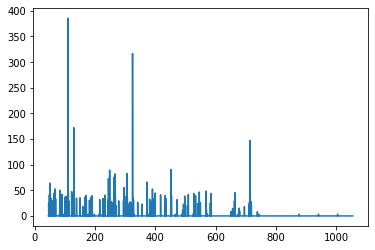

In [20]:
#define the path where files are located
path = os.path.expanduser(r"~/Documents/python/identification_modified_proteins/practice_conversion/practice_1.ascii")

#create new numpy array and load ascii file into it
arr = np.loadtxt(path, delimiter=',', dtype=str)

#convert loaded strings into floats, skipping any uneeded data 
ms_arr = np.array(list(np.core.defchararray.split(arr[8:])), dtype=float)

#plot data to validate spectrum appearance 
plt.plot(ms_arr[:,0],ms_arr[:,1])
plt.show()

#create bin array, number of bins = spaces + 1 
bins = np.linspace(44, 1056, num=101300) 

#converts 2d array into 1d 
mass_arr = np.array(ms_arr[:,0])

#digitize only works with 1d arrays
bin_arr = np.digitize(mass_arr, bins)

#stack new digitized array with our original mass spec data. 
stack_np = np.column_stack((ms_arr, bin_arr)) 

#create a new dataframe with titled columns using our stack_np array
df = pd.DataFrame(stack_np, columns = ['Mass', 'Intensity', 'Bins']) #mass range = bins of 0.01 increments

#sums other categories within the same bin 
bins_df = df.groupby('Bins').sum() 

#create new data frame with just the numpy array of bins created earlier
master_df = pd.DataFrame(bins)

#merge the bins df to our dataframe that has the number of assigned bins
digi_spectrum=master_df.merge(bins_df, how='left', left_index=True, right_index=True)

#remove mass as not needed 
digi_spectrum.drop('Mass',axis=1,inplace=True)

#replace NaN values where no intensity is detected with 0
digi_spectrum.replace(np.NaN, 0, inplace=True)

#convert back to a numpy array
mass_rng_df = digi_spectrum['Intensity'].to_numpy()

In [ ]:
#saving dataframes into numpy files, GYQKNK 734 2+ used as example file
save('GYQKNK 734 2+', mass_rng_df)

#load numpy data for correct save verification
test_load = load('GYQKNK 734 2+.npy')
print(test_load)
print(test_load.shape)
type(test_load)

In [19]:
#files combined 
mod_files = ["GYPK#AK 801.npy", "GYIK#DK 861.npy",'GSQK#FK 834.npy', 'GSPK#AK 727.npy', 'GSIK#NK 786.npy', 'GSIK#FK 819.npy', 'GSHK#FK 843.npy', 'GGQK#NK 771.npy', 'GGQK#FK 804.npy', 'GGPK#FK 773.npy', 'GGPK#AK 697.npy', 'GGIK#NK 756.npy', 'GGIK#AK 713.npy', 'GEQK#FK 876.npy', 'GEPK#NK 812.npy', 'GEIK#NK 828.npy', 'GEIK#FK 861.npy']
collate_mod = np.array([np.load(filename) for filename in mod_files])
stacked_mod = np.vstack(collate_mod)

#get shape to build modified feature
print(stacked_mod.shape)

#create modified feature and column stack to combined modified dataset, 1 meaning modified 
mod_feature = np.repeat(1, [17], axis=0) 

#modified feature column stacked onto data set
all_mod_data = np.column_stack((stacked_mod, mod_feature))

#save data file
save('mod_train_data', all_mod_data)

In [60]:
#files combined 
no_mod_files = ['GYPKFK 736.npy', 'GSQKFK 693.npy', 'GSQKDK 661.npy', 'GSPKNK 629.npy', 'GSPKFK 662.npy', 'GSPKAK 586.npy', 'GSIKFK 678.npy', 'GSIKDK 646.npy', 'GSIKAK 602.npy', 'GSHKAK 626.npy', 'GGQKNK 630.npy', 'GGQKDK 631.npy', 'GGPKNK 599.npy', 'GGPKFK 632.npy', 'GGPKAK 556.npy', 'GGIKFK 648.npy', 'GGIKDK 616.npy', 'GGIKAK 572.npy', 'GGHKAK 596.npy', 'GEQKNK 702.npy', 'GEQKAK 659.npy', 'GEPKAK 628.npy', 'GEIKNK 687.npy', 'GEIKAK 644.npy']
collate_no_mod = np.array([np.load(filename) for filename in no_mod_files])
stacked_no_mod = np.vstack(collate_no_mod)

#get shape to build unmodified feature
print(stacked_no_mod.shape)

#create unmodified feature and column stack to combined unmodified dataset.
no_mod_feature = np.repeat(0, [24], axis=0)

#unmodified feature column stacked onto data set
all_no_mod_data = np.column_stack((stacked_no_mod, no_mod_feature))

#save unmodified data as one file
save('no_mod_train_data', all_no_mod_data)

(24, 101300)


In [66]:
#combine both the modified and unmodified training data that we just created into one file
stack_all_data = np.vstack((all_no_mod_data, all_mod_data)
save('all_train_data', stack_all_data)
print(stack_all_data)                           
stack_all_data.shape

[[ 0.        0.        0.       ...  0.        0.        0.      ]
 [ 0.        0.        0.       ...  0.        0.        0.      ]
 [ 0.        0.        0.       ...  0.        0.        0.      ]
 ...
 [ 0.        0.        0.       ...  0.        0.        1.      ]
 [ 0.        0.       32.666668 ...  0.        0.        1.      ]
 [ 0.        0.       32.666668 ...  0.        0.        1.      ]]


(41, 101301)

Initially, once the data was processed, a problem was encountered when reading the data into the model, however this was due to a lack of understanding when it came to the x and y axis of the data, thinking that mutiple x-axis dimensions were not possible but in fact are allowed when implementing them into a classifier. 

Thus, attempts below were made to convert data into a 41 by 2 dimension to allow for x and y axis. While the conversion was successful, the classifier failed to learn onto this data. This was fixed by assigning one column as the y axis and the rest as the x-axis in our dataset.

In [76]:
#failed exploration into dimension conversion 
load_data = load('train_mod_np.npy')
df = pd.DataFrame(load_data)
df['Intensities'] = df[df.columns[1:]].apply(lambda x: ','.join(x.astype(str)),axis=1)
mod_np = df['Intensities'].to_numpy()
mod_np.shape
mod_feature = np.repeat(1, [17], axis=0)
mod_data_2d = np.column_stack((mod_np, mod_feature))
save('train_no_mod_2d_np', mod_data_2d)
mod_data_2d.shape

(17, 2)

In [77]:
#failed exploration into dimension conversion 
stack_all_np = np.vstack((no_mod_data_2d, mod_data_2d))
stack_all_np.shape
save('all_train_np', stack_all_np)
stack_all_np.shape

(41, 2)

# Third Attempt - Automate filetype conversion and processing 

Will enable user to quickly change bin number depending on the mass range of the mass spectrum as well as allow for exploration into how bin size affects data. 

Attempts were made to use a file path variable to assign into our for loop, however, this was unsuccessful and a workaround to this was to change the current working directory into our desired file location with ascii files read to convert. 

## Initial attempt to change path
Initial attempt to change path directory failed as it was not the current working directory, thus, this was initally done manually. However, drawbacks were that navigation through directories would be needed and also multiple inputs. Second attempt was more successful. 

In [74]:
#change the current working directory (cwd) to directory containing desired files
#to navigate into folder use 'foldername' in cwd or go '../' to move up from cwd
os.chdir('../')

In [75]:
#get the current working directory (cwd)
cwd = os.getcwd() 

# Get all the files in that directory
files = os.listdir(cwd)

#check folder has desired ascii files
print("Files in %r: %s" % (cwd, files))

Files in '/Users/LeandroJumilla/Documents/python/identification_modified_proteins': ['mod_np_2+', '.train_no_mod_np.npy.icloud', '.DS_Store', 'mod_ascii', 'practice_data', 'train_mod_np', '.train_mod_np.npy.icloud', 'hold_out_test_no_mod', 'hold_out_test_mod', '.train_mod_2d_np.npy.icloud', '.no_mod_train_data.npy.icloud', 'scripts', '.mod_train_data.npy.icloud', 'no_mod_ascii', '.ipynb_checkpoints', 'train_no_mod_np', 'no_mod_np_2+', 'practice_conversion', '.train_no_mod_2d_np.npy.icloud', 'encode_ascii_to_np.ipynb']


## Second attempt to change directory path 
Second attempt was successful and improved the efficiency of code needing just one input from the user and remove the need for manual navgation. 

In [103]:
#insert the desired path containing ascii files in the ''. 
path = os.path.expanduser(r"~/Documents/python/identification_modified_proteins/mod_ascii/")

#changes current working directory to the path given 
directory = os.chdir(path)


## Automated ascii file processing and conversion

In [98]:
# give the extension for the files you are looking for
ascii_extension = '.ascii'

#for loop used to convert all ascii data files into numpy arrays with the same number of specified bins
for filename in os.listdir(directory):
    if filename.endswith(ascii_extension):
        #create new numpy array and load ascii file into it
        arr = np.loadtxt(filename, delimiter=',', dtype=str)

        #convert loaded strings into floats, skipping any uneeded data 
        ms_arr = np.array(list(np.core.defchararray.split(arr[8:])), dtype=float)
        
        #create the number of bins using num = spaces + 1, with mass range of 0.01 mass increments
        bins = np.linspace(44, 1056, num=1013)

        #converts 2d array into 1d 
        mass_arr = np.array(ms_arr[:,0])

        #digitizes the mass column of mass spec array and bins by allocating a bin to each intensity and mass row
        bin_arr = np.digitize(mass_arr, bins)

        #combines new bins column to original mass spec array
        stack_np = np.column_stack((ms_arr, bin_arr)) 

        #creates panda dataframe from numpy array
        df = pd.DataFrame(stack_np, columns = ['Mass', 'Intensity', 'Bin']) 

        #sums intensites within the same bin
        bins_df = df.groupby('Bin').sum() 

        #creates another dataframe with just the bin numbers
        master_df = pd.DataFrame(bins)

        #merge by fitting summed intensities in bins_df to the definite number of bins in master_df.
        #ensures that all spectra have the same number of bins.
        digi_spectrum = master_df.merge(bins_df, how='left', left_index=True, right_index=True) 

        #remove mass column as it is not needed
        digi_spectrum.drop('Mass',axis=1,inplace=True)

        #replace any NaN values that occur (no intensity is measured in a bin) as 0
        digi_spectrum.replace(np.NaN, 0, inplace=True)

        #convert panda df to numpy array
        mass_rng_df = digi_spectrum['Intensity'].to_numpy()
        
        #saves file as numpy array
        np.save('{}'.format(filename), mass_rng_df)
    else:
        print('Conversion complete.')

Conversion complete.
Conversion complete.
Conversion complete.
Conversion complete.
Conversion complete.
Conversion complete.
Conversion complete.
Conversion complete.
Conversion complete.
Conversion complete.
Conversion complete.
Conversion complete.
Conversion complete.
Conversion complete.
Conversion complete.
Conversion complete.
Conversion complete.
Conversion complete.
Conversion complete.
Conversion complete.
Conversion complete.
Conversion complete.
Conversion complete.
Conversion complete.


Once ascii files have been read and the data contained has been formatted into a numpy arrays and saved, the next step is to combine the files and add the modified and unmodified features

In [111]:
# give the extension for numpy arrays
np_extension = '.npy'

#for loop used to convert all ascii data files into numpy arrays with the same number of specified bins
for filename in os.listdir(directory):
    if filename.endswith(np_extension):
        
        #load files and assign to variable
        collect_np = np.array([np.load(filename, delimiter=',', dtype=str) for filename in os.listdir(directory)])
        
        #stack binned spectrum arrays in sequence vertically (row wise)
        stacked_np = np.vstack(collect_np)
else: 
    print("Files have been stacked and saved.")

#extract the number of peptides in combined file to create mod/unmodified feature 
peptide_num, feature_num = stacked_np.shape
        
#change 0 if adding unmodified feature or 1 if adding modified feature
mod_feature = np.repeat(0, [peptide_num], axis=0)
        
#unmodified feature column stacked onto data set
feature_added_data = np.column_stack((stacked_np, mod_feature))

#save data as one file, specify whether data is modified or unmodified, training or test data.
save('mod_0.1', feature_added_data)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 0: invalid start byte

Once I had the modified and unmodified files, I then needed to merge the both traning sets to create one file containing both modified and unmodified

In [102]:
#insert the desired path containing ascii files in the ''. 
path = os.path.expanduser(r"~/Documents/python/identification_modified_proteins/bin_size_0.1/")

#changes current working directory to the path given 
directory = os.chdir(path)

# give the extension for numpy arrays
np_extension = '.npy'

#for loop used to convert all ascii data files into numpy arrays with the same number of specified bins
for filename in os.listdir(directory):
    if filename.endswith(np_extension):
        
        #load files and assign to variable
        collect_np = np.array([np.load(filename, allow_pickle=True) for filename in os.listdir(directory)])
        
        #combine both the modified and unmodified training data that we just created into one file
        stack_all_data = np.vstack(collect_np)
        
        #save data
        save('train_0.1_data', stack_all_data)
else:
    print('Stack and Save complete.')
        
        

Stack and Save complete.
